# Playing around with noise schedules

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F

## Visualizing the forward diffusion process

Image shape: torch.Size([563, 1000, 3])
Image dtype: torch.uint8


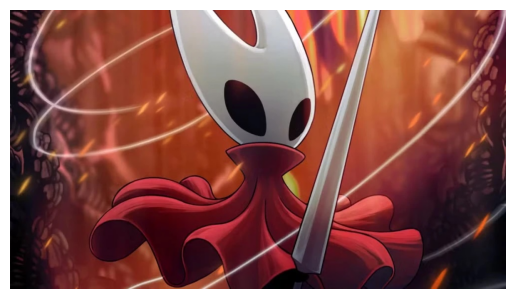

In [12]:

# Load the image
img = Image.open('hornet.jpeg')

# Convert to numpy array
img_array = torch.tensor(np.array(img))

print(f"Image shape: {img_array.shape}")
print(f"Image dtype: {img_array.dtype}")

# Display the numpy array using matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.show()


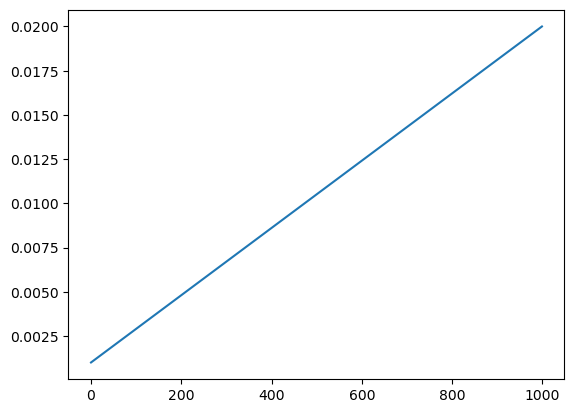

In [6]:
# Noise schedule
T = 1000
beta = np.linspace(1e-3, 0.02, T)
plt.plot(beta)
plt.show()

In [15]:
def forward_diffusion(x_0, num_steps, beta_0, beta_T):
    betas = torch.linspace(beta_0, beta_T, num_steps)
    seq = [x_0]
    
    # Diffuse for num_steps
    for i in range(num_steps):
        b_t = betas[i]
        x_t = torch.sqrt(1 - b_t) * seq[-1].clone().detach() + b_t * torch.randn_like(x_0)
        seq.append(x_t)
    return seq

x_0 = img_array.float() / 255.0
seq = forward_diffusion(x_0, 1000, 0.0001, 0.02)

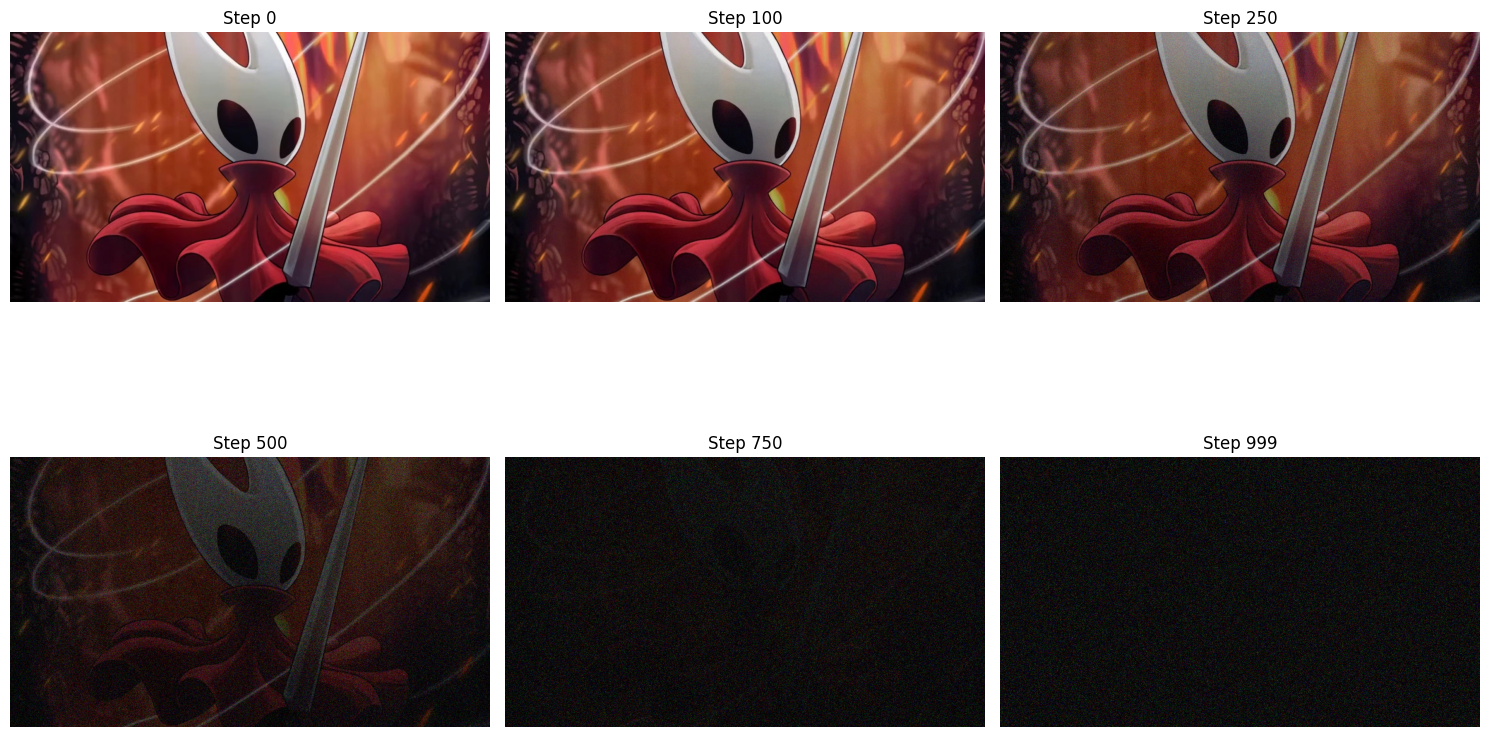

In [21]:
# Display multiple steps of the diffusion process
steps_to_show = [0, 100, 250, 500, 750, 999]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, step in enumerate(steps_to_show):
    axes[idx].imshow(tensor_to_image(seq[step]))
    axes[idx].axis('off')
    axes[idx].set_title(f'Step {step}')

plt.tight_layout()
plt.show()